# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [9]:
# P(A|B) = P(A)*P(B|A) / P(B)

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods)) # Esto es la P(B)
    post = np.divide(np.multiply(priors, likelihoods), marg) # Esto es la P(A|B), la probabilidad a posteriori.
    return post

priors = [1/2, 1/2] # Probabilidad a priori, de que sea un bowl u otro. Esto es la P(A)
likelihoods = [0.75, 0.5] # En cada bowl, probabilidad de que sea de vainilla. Esto es la P(B|A)

bayes_rule(priors, likelihoods)

print("La probabilidad de que una galleta de vainilla cogida de forma random sea del bowl 1 es", bayes_rule(priors, likelihoods)[0])

La probabilidad de que una galleta de vainilla cogida de forma random sea del bowl 1 es 0.6


What is the probability that it came from Bowl 2?

In [8]:
print("La probabilidad de que una galleta de vainilla cogida de forma random sea del bow2 1 es", bayes_rule(priors, likelihoods)[1])

La probabilidad de que una galleta de vainilla cogida de forma random sea del bow2 1 es 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [11]:
priors = [1/2, 1/2] # Probabilidad a priori, de que sea un bowl u otro.
likelihoods = [0.25, 0.5] # En cada bowl, probabilidad de que sea de chocolate.

bayes_rule(priors, likelihoods)

print("La probabilidad de que una galleta de chocolate cogida de forma random sea del bowl 1 es", bayes_rule(priors, likelihoods)[0])
print("La probabilidad de que una galleta de chocolate cogida de forma random sea del bowl 2 es", bayes_rule(priors, likelihoods)[1])

La probabilidad de que una galleta de chocolate cogida de forma random sea del bowl 1 es 0.3333333333333333
La probabilidad de que una galleta de chocolate cogida de forma random sea del bowl 2 es 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [12]:
priors = [1/2, 1/2] # Probabilidad a priori, de que sea una bolsa u otra.
likelihoods = [0.2, 0.14] # En cada bolsa, porcentaje de caramelos amarillos.

bayes_rule(priors, likelihoods)

array([0.58823529, 0.41176471])

In [16]:
print("La probabilidad de que un caramelo amarillo cogido aleatoriamente sea de la bolsa 1 es", round(bayes_rule(priors, likelihoods)[0], 2))

La probabilidad de que un caramelo amarillo cogido aleatoriamente sea de la bolsa 1 es 0.59


What is the probability that the yellow candy came from Bag 2?

In [17]:
print("La probabilidad de que un caramelo amarillo cogido aleatoriamente sea de la bolsa 2 es", round(bayes_rule(priors, likelihoods)[1], 2))

La probabilidad de que un caramelo amarillo cogido aleatoriamente sea de la bolsa 2 es 0.41


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [18]:
priors = [1/2, 1/2] # Probabilidad a priori, de que sea una bolsa u otra.
likelihoods = [0.1, 0.2] # En cada bolsa, porcentaje de caramelos verdes.

bayes_rule(priors, likelihoods)
print("La probabilidad de que un caramelo verde cogido aleatoriamente sea de la bolsa 1 es", round(bayes_rule(priors, likelihoods)[0], 2))
print("La probabilidad de que un caramelo verde cogido aleatoriamente sea de la bolsa 2 es", round(bayes_rule(priors, likelihoods)[1], 2))

La probabilidad de que un caramelo verde cogido aleatoriamente sea de la bolsa 1 es 0.33
La probabilidad de que un caramelo verde cogido aleatoriamente sea de la bolsa 2 es 0.67


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [37]:
priors = [1/2, 1/2]
likelihoods = [0.5, 0.5]

bayes_rule(priors, likelihoods)

array([0.5, 0.5])

Por hacer una reflexión y contrastar la solución:

Una vez el presentador ha dicho que en la puerta B no está el coche, si sale el coche, qué probabilidad hay de que sea de la puerta A.

P(puerta A | sale coche) = P(sale coche | puerta A) * P(puerta A) / P(sale coche)

* **P(sale coche | puerta A)** = 0.5  , es decir, si se escoge la puerta A, la probabilidad de que haya un coche es 0.5 (antes de que el presentador mostrara la puerta B, esta probabildad era 1/3)
* **P(puerta A)** = 0.5  , es la probabilidad de escoger la puerta A entre la A y la C (antes de que el presentador mostrara la puerta B, esta probabilidad era 1/3).
* **P(sale coche)** = 0.5\*0.5 + 0.5\*0.5  , es la probabilidad de que salga coche en la puerta A + salga coche en C

In [36]:
0.5 * 0.5 / (0.5*0.5 + 0.5*0.5)

0.5

In [ ]:
# P(A tiene coche|B tiene cabra) = P(B tiene cabra|A tiene coche)*P(A tiene coche) / P(B tiene cabra)

# P(B tiene cabra|A tiene coche) = 1
# P(A tiene coche) = 1/3
# P(B tiene cabra) = 2/3

1 * (1/3) / (2/3) 

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

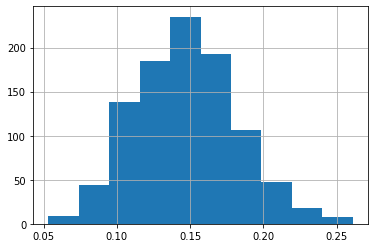

In [23]:
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

observed = 14

def generative_model(param):
    """
    Generative model that will randomly draw from our prior uniform distribution,
    simulate 50 people coming to our website a large number of time,
    and see how many times we get a result that is in line with the result we have observed
    """
    result = np.random.binomial(100, param)
    return result

sim_data = list() # Empty list that is going to contain our simulated results

for p in prior:
    sim_data.append(generative_model(p))

posterior = prior[list(map(lambda x: x == observed, sim_data))]

posterior.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [24]:
posterior.describe()

count    983.000000
mean       0.147431
std        0.034940
min        0.053352
25%        0.121749
50%        0.146524
75%        0.169722
max        0.261080
dtype: float64

What is the 90% credible interval range?

In [26]:
print(posterior.quantile(.05), '|', posterior.quantile(.95))

0.0931568991532597 | 0.2079750575372617


What is the Maximum Likelihood Estimate?

In [28]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate:', mode, '|', probability)

Maximum Likelihood Estimate: 0.15 | 0.11698880976602238


This tells us that given the data we have thus far, it is most likely that 15% of the visitors to the site will sign up for landscaping services.